# Data Understanding

### Import Libraries

In [23]:
%matplotlib inline

import pandas as pd
import numpy as np
from datetime import datetime

In [24]:
pd.set_option("display.max_rows", 500)

In [25]:
dataPath_Raw = ("../data/raw/COVID-19/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv")
dataPath_Processed = ("../data/processed/")

In [26]:
pd_raw = pd.read_csv(dataPath_Raw)
pd_raw.head();

### Extract the columns

In [27]:
pd_raw.columns[:]

Index(['Province/State', 'Country/Region', 'Lat', 'Long', '1/22/20', '1/23/20',
       '1/24/20', '1/25/20', '1/26/20', '1/27/20',
       ...
       '6/10/20', '6/11/20', '6/12/20', '6/13/20', '6/14/20', '6/15/20',
       '6/16/20', '6/17/20', '6/18/20', '6/19/20'],
      dtype='object', length=154)

In [28]:
time_idX = pd_raw.columns[4:]

In [29]:
df_plot = pd.DataFrame({
    
    'date':time_idX})

df_plot.head()


,date
0,1/22/20
1,1/23/20
2,1/24/20
3,1/25/20
4,1/26/20


In [30]:
len(pd_raw['Country/Region'].unique())
pd_raw['Country/Region'].unique();

### Define a DF with Country as a Column Name

In [31]:
pd_raw[pd_raw['Country/Region']=="Afghanistan"];

In [32]:
pd_raw[pd_raw['Country/Region']=="India"].iloc[:,4::].sum(axis=0);

In [33]:
country_list = [
    'Italy',
    'US',
    'Spain',
    'Germany',
    'India',
    'Korea, South',
    'China',
    'Brazil',
    'United Kingdom'
]

#country_list = pd_raw['Country/Region'].unique()

In [34]:
for i in country_list:
    df_plot[i] = np.array(pd_raw[pd_raw['Country/Region'] == i].iloc[:,4::].sum(axis=0))

In [35]:
df_plot;

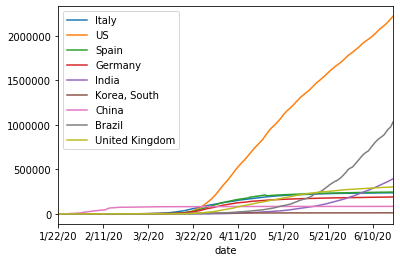

In [36]:
df_plot.set_index('date').plot()

### Data Type Date

In [37]:
df_plot.head()

,date,Italy,US,Spain,Germany,India,"Korea, South",China,Brazil,United Kingdom
0,1/22/20,0,1,0,0,0,1,548,0,0
1,1/23/20,0,1,0,0,0,1,643,0,0
2,1/24/20,0,2,0,0,0,2,920,0,0
3,1/25/20,0,2,0,0,0,2,1406,0,0
4,1/26/20,0,5,0,0,0,3,2075,0,0


In [38]:
df_plot.date[0]

'1/22/20'

In [39]:
datetime.strptime(df_plot.date[0], "%m/%d/%y")

datetime.datetime(2020, 1, 22, 0, 0)

In [40]:
#Convert the String to DateTime object

time_idX = [datetime.strptime(i, "%m/%d/%y") for i in df_plot.date] 

# Converting back to ISO (str)

time_str = [i.strftime("%y-%m-%d") for i in time_idX]

#time_idX

In [41]:

#time_idX[0:5]
#type(time_idX)

In [42]:
df_plot['date']=time_idX
type(df_plot["date"][0])

pandas._libs.tslibs.timestamps.Timestamp

In [43]:
df_plot.head()

,date,Italy,US,Spain,Germany,India,"Korea, South",China,Brazil,United Kingdom
0,2020-01-22,0,1,0,0,0,1,548,0,0
1,2020-01-23,0,1,0,0,0,1,643,0,0
2,2020-01-24,0,2,0,0,0,2,920,0,0
3,2020-01-25,0,2,0,0,0,2,1406,0,0
4,2020-01-26,0,5,0,0,0,3,2075,0,0


In [44]:
df_plot.to_csv(dataPath_Processed + "COVID_Flat_Table_small.csv", sep=",", index=False)